<a href="https://colab.research.google.com/github/sohaamir/MRICN/blob/main/aamir_vs_chris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Who has the bigger brain, me or Chris Gorgolewski? A gentle introduction to visualization using nilearn and nibabel**







# What is Google Colab?
**Google Colaboratory** is is a free cloud-based platform provided by Google that offers a Jupyter notebook environment for writing and executing Python code. It is primarily used for data analysis tasks but can also be used for general-purpose Python programming. It has many benefits when working with data (including neuroimaging data) such as:

1.   Free access
2.   Cloud-based hosting (available everywhere)
3.   GPU/TPU Support (lots of processing power)
4.   External Data Access (import data GitHub, Google Drive, local machine)

It is an interactive environment similar to Anaconda, but with certain advantages (like those mentioned above). Similarly, Colab allows for users to run code in small chunks called 'cells', displaying any output such as images directly within the notebook as well. The programming language used by these notebooks is `Python`, which it organises in the form of `Colab Notebooks`.

## What can we do in Google Colab?

We can do a whole bunch of things...

### We can use it for data visualization and plotting

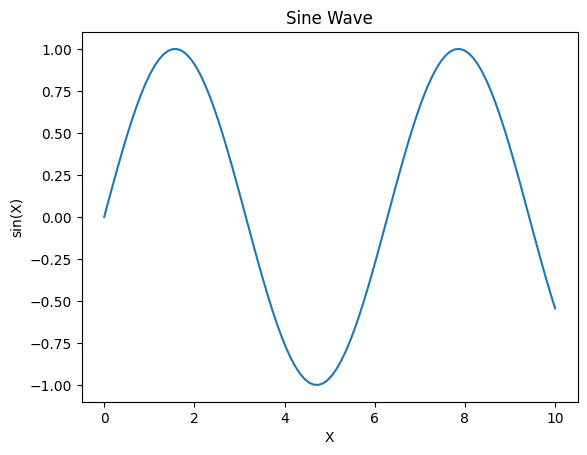

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("X")
plt.ylabel("sin(X)")
plt.show()

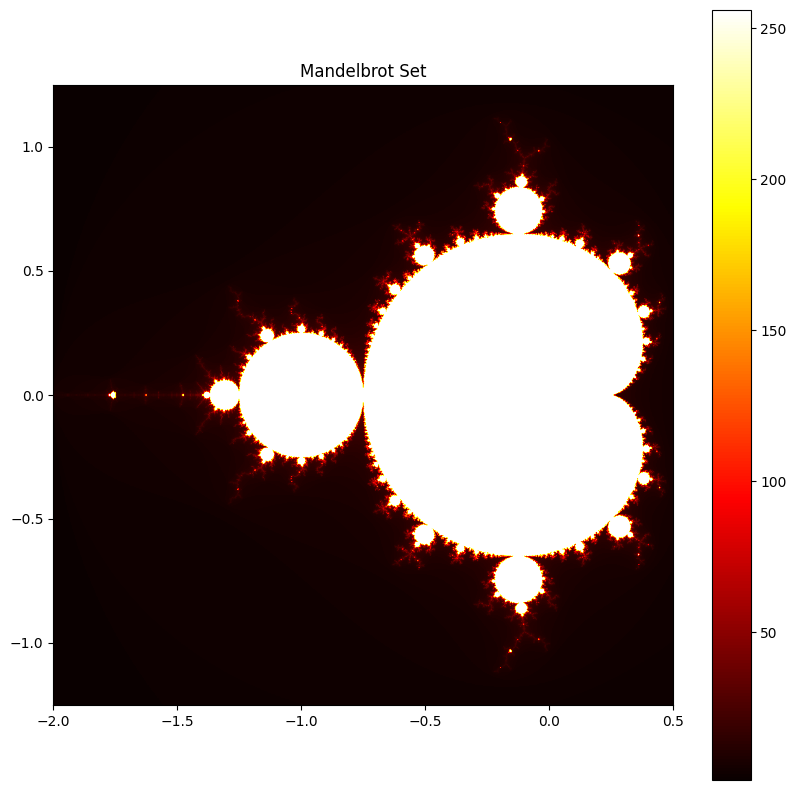

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_image(xmin, xmax, ymin, ymax, width=10, height=10, max_iter=256):
    # Create a width x height grid of complex numbers
    x = np.linspace(xmin, xmax, width * 100)
    y = np.linspace(ymin, ymax, height * 100)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    # Compute Mandelbrot set
    img = np.zeros(C.shape, dtype=int)
    for i in range(width * 100):
        for j in range(height * 100):
            img[j, i] = mandelbrot(C[j, i], max_iter)

    # Plotting
    plt.figure(figsize=(width, height))
    plt.imshow(img, extent=(xmin, xmax, ymin, ymax), cmap='hot')
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.show()

# Parameters defining the extent of the region in the complex plane we're going to plot
xmin, xmax, ymin, ymax = -2.0, 0.5, -1.25, 1.25
width, height = 10, 10
max_iter = 256

mandelbrot_image(xmin, xmax, ymin, ymax, width, height, max_iter)

### Or even watch YouTube

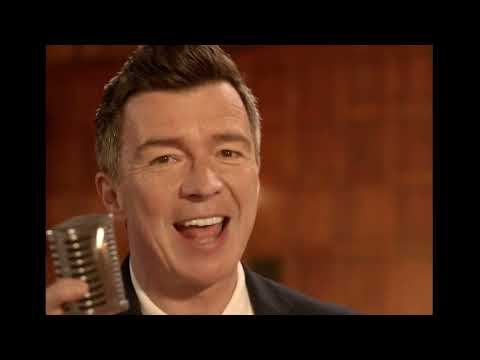

In [37]:
from IPython.display import YouTubeVideo

# Embedding the YouTube video
YouTubeVideo('GtL1huin9EE', width=800, height=450)

![Cute Cat](https://nipy.org/nibabel/_static/nibabel-logo.svg)


# What are nibabel and nilearn?

## nibabel

`nibabel` is designed to provide a simple, uniform interface to various neuroimaging file formats, allowing users to easily manipulate neuroimaging data within Python scripts or interactive environments like Jupyter notebooks.

Key features and capabilities of `nibabel` include:

- Reading and Writing Neuroimaging Data: `nibabel` allows you to read data from disk into Python data structures and write data back to disk in various neuroimaging formats.

- Data Manipulation: Once loaded into Python, neuroimaging data can be manipulated just like any other data structure. This includes operations like slicing, statistical analyses, and visualization.

- Header Access: `nibabel` provides access to the headers of neuroimaging files, which contain metadata about the imaging data such as dimensions, voxel sizes, data type, and orientation. This is crucial for understanding and correctly interpreting the data.

- Affine Transformations: It supports affine transformations that describe the relationship between voxel coordinates and world coordinates, enabling spatial operations on the data.

## nilearn

`nilearn` is a Python library designed to facilitate fast and easy statistical learning analysis and manipulation of neuroimaging data. It builds on libraries such as numpy, scipy, scikit-learn, and pandas, offering a comprehensive toolkit for neuroimaging data processing, with a focus on machine learning applications. `nilearn` aims to make it easier for researchers in neuroscience and machine learning to use Python for sophisticated imaging data analysis and visualization.

In this intro, we won't be focusing on the more advanced uses such as those involving machine learning, but just leveraging it's ability to perform simple functions with structural MRI images.

To this end, one of the strengths of `nilearn` is its powerful and flexible plotting capabilities, designed specifically for neuroimaging data. It provides functions to visualize MRI volumes, statistical maps, connectome diagrams, and more, with minimal code.

Before we get started, we need to install the necessary packages and import the NIFTIs. We will use T1-weighted structural MRI scans, one of myself and one that I copied from [OpenNeuro](https://openneuro.org/), a website for openly available neuroimaging datasets.

In [2]:
# Install necessary packages
!pip install nibabel matplotlib nilearn
!pip install imageio

# Download the MRI scan files from GitHub and rename them
!wget https://github.com/sohaamir/aamir_vs_chris/raw/main/chris_T1.nii -O chris_brain.nii
!wget https://github.com/sohaamir/aamir_vs_chris/raw/main/aamir_T1.nii -O aamir_brain.nii

import nibabel as nib
import nilearn as nil
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import imageio
import os


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 41.1 MB/s eta 0:00:00
--2024-02-15 17:04:21--  https://github.com/sohaamir/aamir_vs_chris/raw/main/chris_T1.nii
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/sohaamir/MRICN/raw/main/chris_T1.nii [following]
--2024-02-15 17:04:21--  https://github.com/sohaamir/MRICN/raw/main/chris_T1.nii
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sohaamir/MRICN/main/chris_T1.nii [following]
--2024-02-15 17:04:21--  https://raw.githubusercontent.com/sohaamir/MRICN/main/chris_T1.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443

## What can we do with our data using nibabel?

### Checking the data shape and type
The code below loads a NIfTI image and prints out its shape and data type. The shape tells us the dimensions of the image, which typically includes the number of voxels in each spatial dimension (X, Y, Z) and sometimes time or other dimensions. The data type indicates the type of data used to store voxel values, such as float or integer types.


In [39]:
# Load the first image using nibabel
t1_aamir_path = 'aamir_brain.nii'
t1_aamir_image = nib.load(t1_aamir_path)

# Now let's check the image data shape and type
print("Aamir's image shape:", t1_aamir_image.shape)
print("Aamir's image data type:", t1_aamir_image.get_data_dtype())

Aamir's image shape: (192, 256, 256)
Aamir's image data type: int16


### Accessing the NIFTI metadata
Each NIfTI file also comes with a header containing metadata about the image. Here we've extracted the voxel sizes, which represent the physical space covered by each voxel, and the image orientation, which tells us how the image data is oriented in space.

In [40]:
# Access the image header
header_aamir = t1_aamir_image.header

# Print some header information
print("Aamir's voxel size:", header_aamir.get_zooms())
print("Aamir's image orientation:", nib.aff2axcodes(t1_aamir_image.affine))

Aamir's voxel size: (0.94, 0.9375, 0.9375)
Aamir's image orientation: ('R', 'A', 'S')


### Data visulization and comparison
We can visualize the data from our NIfTI file by converting it to a numpy array and then using `matplotlib` to display a slice. In this example, we've displayed an axial slice from the middle of the brain, which is a common view for inspecting T1-weighted images.

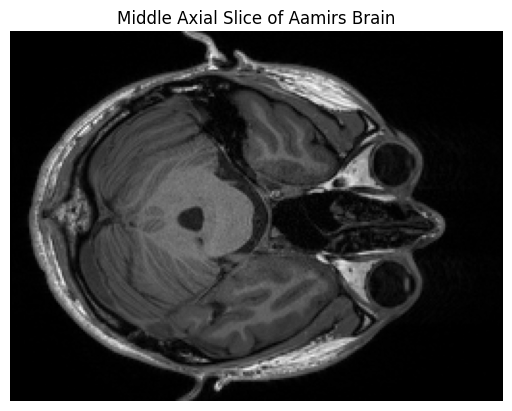

In [41]:
# Get the image data as a numpy array
aamir_data = t1_aamir_image.get_fdata()

# Display one axial slice of the image
aamir_slice_index = aamir_data.shape[1] // 2  # Get the middle index along Z-axis
plt.imshow(aamir_data[:, :, aamir_slice_index], cmap='gray')
plt.title('Middle Axial Slice of Aamirs Brain')
plt.axis('off')  # Hide the axis to better see the image
plt.show()

Now we can load a second T1-weighted image and printed its shape for comparison. By comparing the shapes of the two images, we can determine if they are from the same scanning protocol or if they need to be co-registered for further analysis.

In [42]:
# Load the second image
t1_chris_path = 'chris_brain.nii'
t1_chris_image = nib.load(t1_chris_path)

# Let's compare the shapes of the two images
print("First image shape:", t1_aamir_image.shape)
print("Second image shape:", t1_chris_image.shape)

First image shape: (192, 256, 256)
Second image shape: (176, 240, 256)


Now that we have loaded both T1-weighted MRI images, we are interested in

---

visualizing and comparing them directly. To do this, we will extract the data from the second image, `chris_brain.nii`, and display a slice from it alongside a slice from the first image, `aamir_brain.nii`.


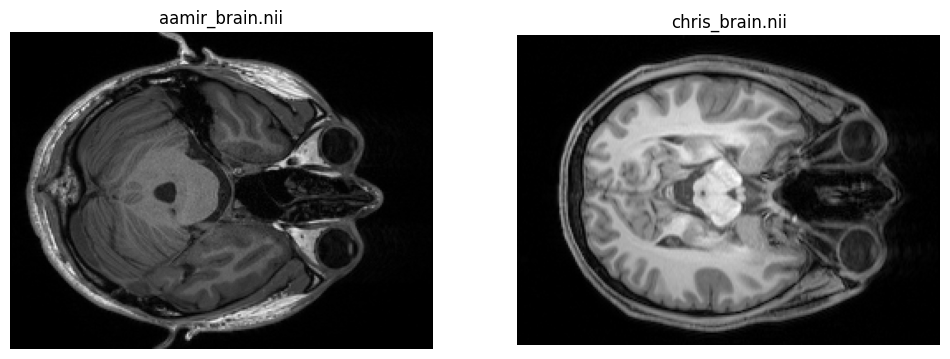

In [44]:
# Get data for the second image
chris_data = t1_chris_image.get_fdata()
chris_slice_index = chris_data.shape[1] // 2  # Get the middle index along Z-axis

# Display a slice from both images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot first image slice
axes[0].imshow(aamir_data[:, :, aamir_slice_index], cmap='gray')
axes[0].set_title('aamir_brain.nii')
axes[0].axis('off')

# Plot second image slice
axes[1].imshow(chris_data[:, :, chris_slice_index], cmap='gray')
axes[1].set_title('chris_brain.nii')
axes[1].axis('off')

plt.show()

### Creating Animated GIFs from MRI Scans

To visualize the structure of the brain in MRI scans, we can create an animated GIF that scrolls through each slice of the scan. This is particularly useful for examining the scan in a pseudo-3D view by observing one slice at a time through the entire depth of the brain.

The following code defines a function `create_gif_from_mri_normalized` that processes an MRI scan file and produces an animated GIF. The MRI data is first normalized by clipping the top and bottom 1% of pixel intensities, which enhances contrast and detail. The scan is then sliced along the sagittal plane, and each slice is converted to an 8-bit grayscale image and compiled into an animated GIF. This normalization process ensures that the resulting GIF maintains visual consistency across different scans.

We apply this function to two MRI scans, `aamir_brain.nii` and `chris_brain.nii`, creating a GIF for each. These GIFs, named 'aamir_brain_normalized.gif' and 'chris_brain_normalized.gif', respectively, will allow us to visually assess and compare the scans.

In [45]:
# Function to normalize and create a GIF from a 3D MRI scan in the sagittal plane
def create_gif_from_mri_normalized(path, gif_name):
    # Load the image and get the data
    img = nib.load(path)
    data = img.get_fdata()

    # Normalize the data for better visualization
    # Clip the top and bottom 1% of pixel intensities
    p2, p98 = np.percentile(data, (2, 98))
    data = np.clip(data, p2, p98)
    data = (data - np.min(data)) / (np.max(data) - np.min(data))

    # Prepare to capture the slices
    slices = []
    # Sagittal slices are along the x-axis, hence data[x, :, :]
    for i in range(data.shape[0]):
        slice = data[i, :, :]
        slice = np.rot90(slice)  # Rotate or flip the slice if necessary
        slices.append((slice * 255).astype(np.uint8))  # Convert to uint8 for GIF

    # Create a GIF
    imageio.mimsave(gif_name, slices, duration=0.1)  # duration controls the speed of the GIF

# Create GIFs from the MRI scans
create_gif_from_mri_normalized('aamir_brain.nii', 'aamir_brain_normalized.gif')
create_gif_from_mri_normalized('chris_brain.nii', 'chris_brain_normalized.gif')


After generating the GIFs for each MRI scan, we can now display them directly within the notebook. This visualization provides us with an interactive view of the scans, making it easier to observe the entire brain volume as a continuous animation.

Below, we use the `IPython.display` module to render the GIFs in the notebook. The first GIF corresponds to Aamir's brain scan, and the second GIF corresponds to Chris's brain scan. These inline animations can be a powerful tool for presentations, education, and qualitative analysis, offering a dynamic view into the MRI data without the need for specialized neuroimaging software.

In [ ]:
from IPython.display import Image, display

# Display the GIF for Aamir's MRI
display(Image(filename='aamir_brain_normalized.gif'))

# Display the GIF for Chris's MRI
display(Image(filename='chris_brain_normalized.gif'))

# What can we do with our data using nilearn?

### Visualizing Brain Overlays

With `nilearn`, we can create informative visualizations of brain images. One common technique is to overlay a statistical map or a labeled atlas on top of an anatomical image for better spatial context. Here, we will demonstrate how to overlay a standard atlas on our T1-weighted MRI images. This allows us to see how different brain regions delineated by the atlas correspond to structures within the actual brain images.

In [ ]:
from nilearn import plotting, datasets

# Load the atlas
atlas_data = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# Plotting the atlas map overlay on the first image
plotting.plot_roi(atlas_data.maps, bg_img='aamir_brain.nii', title="Aamir's Brain with Atlas Overlay", display_mode='ortho', cut_coords=(0, 0, 0), cmap='Paired')

# Plotting the atlas map overlay on the second image
plotting.plot_roi(atlas_data.maps, bg_img='chris_brain.nii', title="Chris's Brain with Atlas Overlay", display_mode='ortho', cut_coords=(0, 0, 0), cmap='Paired')

plotting.show()

Note that the atlas is formatted correctly on Chris's brain but not Aamir's. **Why do you think this is?**

### Extracting Connectome Features

`nilearn` can also be used to compute connectivity matrices, which represent the connections in the brain, typically from fMRI data. While our data is from T1-weighted MRIs and not functional scans, we can still illustrate the process. If we had resting-state fMRI (rs-fMRI) data for these subjects, we could compute the functional connectome, which is a powerful tool for understanding brain network organization.

In [ ]:
from nilearn.connectome import ConnectivityMeasure

# For demonstration purposes, let's assume we have preprocessed fMRI time series data for regions of interest (ROIs)
# Here we'll just create some random time series data

time_series_aamir = np.random.rand(200, 5)  # 200 time points, 5 ROIs
time_series_chris = np.random.rand(200, 5)

# Compute correlation matrices
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix_aamir = correlation_measure.fit_transform([time_series_aamir])[0]
correlation_matrix_chris = correlation_measure.fit_transform([time_series_chris])[0]

# Now let's plot the correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Aamir's brain
axes[0].matshow(correlation_matrix_aamir, cmap='coolwarm')
axes[0].set_title("Aamir's Functional Connectome")

# Plot for Chris's brain
axes[1].matshow(correlation_matrix_chris, cmap='coolwarm')
axes[1].set_title("Chris's Functional Connectome")

plt.show()

### Performing Statistical Analysis on Brain Images

`nilearn` provides tools to perform statistical tests on brain images. For example, we could use it to compare voxel-wise differences between two groups of images. This type of analysis is common in studies looking for brain changes associated with a condition or disease. Below, we demonstrate a simple voxel-wise t-test between our two brain images as an illustrative example.

In [ ]:
from nilearn.image import resample_to_img, math_img
import nibabel as nib
from nilearn import plotting

# Load the brain images
img_aamir = nib.load('aamir_brain.nii')
img_chris = nib.load('chris_brain.nii')

# Resample Chris' image to Aamir's image space
img_chris_resampled = resample_to_img(img_chris, img_aamir)

# Perform a voxel-wise subtraction between the images
t_test_result = math_img('img1 - img2', img1=img_aamir, img2=img_chris_resampled)

# Visualize the t-test results
plotting.plot_stat_map(t_test_result, title="T-test Result (Aamir - Chris)", threshold=3)

plotting.show()


### Plotting Brain Images with Nilearn

`nilearn` offers convenient functions for visualizing neuroimaging data. It can handle various brain imaging data formats and provides easy-to-use tools for plotting. Here, we will use `nilearn` to plot axial slices from our two T1-weighted MRI images, `aamir_brain.nii` and `chris_brain.nii`. This allows us to visually inspect the anatomy and quality of the scans.



In [ ]:
from nilearn import plotting

# Plotting the axial view of Aamir's brain
aamir_img = 'aamir_brain.nii'
plotting.plot_anat(aamir_img, title="Axial View of Aamir's Brain", display_mode='z', cut_coords=10)

# Plotting the axial view of Chris's brain
chris_img = 'chris_brain.nii'
plotting.plot_anat(chris_img, title="Axial View of Chris's Brain", display_mode='z', cut_coords=10)

plotting.show()

### Statistical Analysis of Brain Images

With `nilearn`, we can also perform statistical analysis on the brain imaging data. For instance, we can calculate and plot the mean intensity of the brain images across slices. This can reveal differences in signal intensity and distribution between the two scans, which might be indicative of varying scan parameters or anatomical differences.


In [ ]:
import numpy as np
from nilearn.image import mean_img

# Calculating the mean image for both scans
mean_aamir_img = mean_img(aamir_img)
mean_chris_img = mean_img(chris_img)

# Plotting the mean images
plotting.plot_epi(mean_aamir_img, title="Mean Image of Aamir's Brain")
plotting.plot_epi(mean_chris_img, title="Mean Image of Chris's Brain")

plotting.show()

### Data Transformation and Manipulation

`nilearn` is not just for plotting—it also provides tools for image manipulation and transformation. We can apply operations such as smoothing, filtering, or masking to the brain images. Below, we will smooth the images using a Gaussian filter, which is often done to reduce noise and improve signal-to-noise ratio before further analysis. After smoothing, we'll save these new versions of the images to disk.


In [ ]:
from nilearn.image import smooth_img

# Applying a Gaussian filter for smoothing (with 6mm FWHM)
smoothed_aamir_img = smooth_img(aamir_img, fwhm=6)
smoothed_chris_img = smooth_img(chris_img, fwhm=6)

# Save the smoothed images to disk
smoothed_aamir_img.to_filename('smoothed_aamir_brain.nii')
smoothed_chris_img.to_filename('smoothed_chris_brain.nii')

# Plotting the smoothed images
plotting.plot_anat(smoothed_aamir_img, title="Smoothed Aamir's Brain")
plotting.plot_anat(smoothed_chris_img, title="Smoothed Chris's Brain")

plotting.show()

# Seeing who has the bigger brain

## **Meet Chris:**

<img src="https://avatars.githubusercontent.com/u/238759?v=4" width="300" alt="Chris">

[He's](https://www.linkedin.com/in/chrisgorgolewski/) a Senior Product Manager at Google. Before that he was Co-Director of the Center for Reproducible Neuroscience at Stanford University. Before that he was a postdoc at the Max Planck Institute for Human Cognitive and Brain Sciences, and before that he completed a PhD at the University of Edinburgh.


## **Meet Aamir:**

<img src="https://avatars.githubusercontent.com/u/35841800?v=4" width="300" alt="Aamir">

[He's](https://sohaamir.github.io/) a PhD student in Psychology at the University of Birmingham. Before that he worked as a Junior Research Fellow and Operations Support at the University of Reading. Before that he did an MSc in Brain Imaging at the University of Nottingham, and before that he completed a BSc in Biomedical Science at Imperial College London.

Given these two profiles, **how can we discern who is more intelligent?**

This is a question that has puzzled psychologists for way over a century, but let's take the opinion that you can generally who is more intelligent by the [size of their brain](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7440690/).

To do this we have to skull-strip the brains, which we can't do using `nibabel` or `nilearn`. It is something possible through `nipype` but that is beyond the scope of this exercise.

Instead, I have skull-stripped the two images using `BET` in `FSL`.

## Chris's brain
<img src="https://raw.githubusercontent.com/sohaamir/MRICN/main/chris_brain.png" width="900" alt="Aamir">

## Aamir's brain
<img src="https://raw.githubusercontent.com/sohaamir/MRICN/main/aamir_brain.png" width="900" alt="Aamir">

## So now let's see who's brain is bigger (place your BETs!)
(pun intended)

In [3]:
!wget https://github.com/sohaamir/aamir_vs_chris/raw/main/chris_bet.nii -O chris_bet.nii
!wget https://github.com/sohaamir/aamir_vs_chris/raw/main/aamir_bet.nii -O aamir_bet.nii

# Load the skull-stripped brain images
chris_img = image.load_img('chris_bet.nii')
aamir_img = image.load_img('aamir_bet.nii')

# Convert the images to data arrays
chris_data = chris_img.get_fdata()
aamir_data = aamir_img.get_fdata()

# Calculate the size by counting the non-zero voxels in the brain mask
chris_size = np.sum(chris_data > 0)
aamir_size = np.sum(aamir_data > 0)

# Print out the sizes and determine which is larger
print(f"Chris's brain size: {chris_size} voxels")
print(f"Aamir's brain size: {aamir_size} voxels")

# Determine which brain is larger
if chris_size > aamir_size:
    print("Chris has the larger brain.")
elif aamir_size > chris_size:
    print("Aamir has the larger brain.")
else:
    print("Both brains are the same size.")

--2024-02-15 17:04:31--  https://github.com/sohaamir/aamir_vs_chris/raw/main/chris_bet.nii
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/sohaamir/MRICN/raw/main/chris_bet.nii [following]
--2024-02-15 17:04:31--  https://github.com/sohaamir/MRICN/raw/main/chris_bet.nii
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sohaamir/MRICN/main/chris_bet.nii [following]
--2024-02-15 17:04:31--  https://raw.githubusercontent.com/sohaamir/MRICN/main/chris_bet.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432541

NameError: name 'image' is not defined

```
Chris's brain size: 1480032 voxels
Aamir's brain size: 1799361 voxels
```

So, it seems as if Aamir has the bigger brain. We can doublecheck these results by running the same analysis using `fslstats`.

The code to run this on your local machine is:

```
# Calculate the number of non-zero voxels for Chris' brain
chris_voxels=$(fslstats chris_bet.nii -V | awk '{print $1}')

# Calculate the number of non-zero voxels for Aamir's brain
aamir_voxels=$(fslstats aamir_bet.nii -V | awk '{print $1}')

# Print the number of voxels
echo "Chris' brain size in voxels: $chris_voxels"
echo "Aamir's brain size in voxels: $aamir_voxels"

# Compare the voxel counts and print who has the bigger brain
if [ "$chris_voxels" -gt "$aamir_voxels" ]; then
    echo "Chris has the bigger brain."
elif [ "$chris_voxels" -lt "$aamir_voxels" ]; then
    echo "Aamir has the bigger brain."
else
    echo "Both brains are the same size."
fi
```
which gives:

```
Chris' brain size in voxels: 1480032
Aamir's brain size in voxels: 1799361
Aamir has the bigger brain.
```